# Millco Problem
>Adapted from https://laurentlessard.com/teaching/cs524/slides/5%20-%20network%20flow%20problems.pdf

>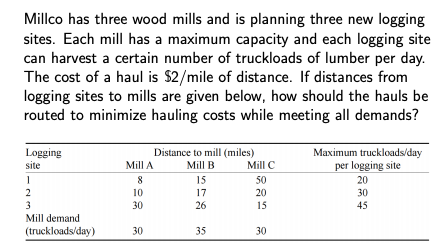

Our decision variables are:
$$
\begin{equation*}
\ x_{ij}  \text{ = flow on edge (i,j) where i = sites 1:3 and j = mills a:c}\\
\end{equation*}
$$

Our parameters are probably worth defining:
$$
\begin{equation*}
\ s_{i}  \text{the supply of site i}\\
\ d_{j}  \text{the demand of site j}\\
\ dist_{ij}  \text{ = distance from i to j, where i = sites 1:3 and j = mills a:c}\\
\end{equation*}
$$

Our constraints are:
$$
\begin{equation*}
\ x_{ij} \geq 0  \text{ the load from i to j (site i to mill j) is greater than or equal to 0}\\
\sum_{j=a}^c x_{i j} =  s_{i}\text{ for all sites i,  this is our supply constraint}\\
\sum_{i=1}^3 x_{i j} =  d_{j}\text{for all mills j,  this is our demand constraint}
\end{equation*}
$$

Our objective function is:
$$
\begin{equation*}
\ 4*\sum_{j=a}^{c}\sum_{i=1}^{3} x_{i j} * dist_{ij}
\end{equation*}
$$

In [1]:
sites = ["site1", "site2", "site3"]
mills = ["milla", "millb", "millc"]
s = [20,30,45] #supply
d = [30,35,30] #demand
dist = [8, 15, 50, 10, 17, 20, 30, 26, 15] #array of distances between sites i and mills j

#create a list of tuples containing all possible sites and mills
Routes = [(i,j) for i in sites for j in mills]

#create a dictionary to hold the distance between site i and mill j, where site i and mill j are keys and the distance is value
dist_dict = {}
dur_iter = 0
for (site, mill) in Routes:
    dist_dict[(site, mill)] = dist[dur_iter]
    dur_iter = dur_iter + 1
print(dist_dict)


{('site1', 'milla'): 8, ('site1', 'millb'): 15, ('site1', 'millc'): 50, ('site2', 'milla'): 10, ('site2', 'millb'): 17, ('site2', 'millc'): 20, ('site3', 'milla'): 30, ('site3', 'millb'): 26, ('site3', 'millc'): 15}


In [2]:
#Import PuLP modeler functions
from pulp import *

In [3]:
#Create the 'prob' variable to contain the problem data
prob = LpProblem("Millco", LpMinimize)

In [4]:
#Create the Xij variable
Truckloads = LpVariable.dicts("Truckloads", (sites, mills),0,None,LpInteger)

In [5]:
#Add the objective function
prob += 4* (lpSum(Truckloads[sites][mills]*dist_dict[(sites, mills)] for (sites, mills) in Routes))

In [6]:
#Add the constraints

#The supply constraint
for i in range(0,3):
    site = sites[i]
    prob += lpSum(Truckloads[site][mill] for mill in mills) == s[i] 
    
#The demand constraint
for j in range(0,3):
    mill = mills[j]
    prob += lpSum(Truckloads[site][mill] for site in sites) == d[j]

In [7]:
prob.writeLP("MillCo.lp")

In [8]:
prob.solve()

1

In [9]:
#Print the variables
for v in prob.variables():
    print(v.name, "=", v.varValue)

Truckloads_site1_milla = 20.0
Truckloads_site1_millb = 0.0
Truckloads_site1_millc = 0.0
Truckloads_site2_milla = 10.0
Truckloads_site2_millb = 20.0
Truckloads_site2_millc = 0.0
Truckloads_site3_milla = 0.0
Truckloads_site3_millb = 15.0
Truckloads_site3_millc = 30.0
